In [256]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import skimage
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2grey
from skimage.feature import hog
import cv2


images_dir = Path('/content/drive/MyDrive/kaggle/rice/ricedisease')
folders = [directory for directory in images_dir.iterdir() if directory.is_dir()]
categories = [fo.name for fo in folders]

images = []
flat_data = []
target = []
target_names=categories

for i, direc in enumerate(folders):
  for file in direc.iterdir():
    image = skimage.io.imread(file)
    grey_image=rgb2grey(image)
    image_resized=resize(grey_image,(224,224),anti_aliasing=True, mode='reflect')
    images.append(image_resized)
    flat_data.append(image_resized.flatten())
    target.append(i)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [257]:
flat_data.shape


(163, 50176)

In [258]:
images.shape

(163, 224, 224)

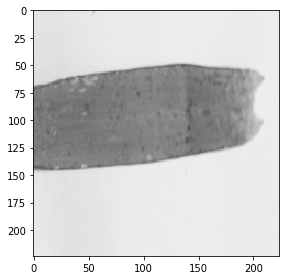

In [259]:
from skimage.io import imshow
newimage=imshow(image_resized)

In [260]:
folders

[PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Healthy'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Bacterial leaf blight'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Brown spot'),
 PosixPath('/content/drive/MyDrive/kaggle/rice/ricedisease/Leaf smut')]

In [66]:
target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3])

In [214]:
target_names

['Healthy', 'Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [30]:
flat_data

array([[0.97254902, 0.96862745, 0.98823529, ..., 0.74114521, 0.74050745,
        0.76862745],
       [0.87843137, 0.87843137, 0.90196078, ..., 0.78453583, 0.78407738,
        0.83135831],
       [0.9372549 , 0.94117647, 0.96078431, ..., 0.78823529, 0.78706232,
        0.83529412],
       ...,
       [0.9254902 , 0.88235294, 0.85882353, ..., 0.94117647, 0.90980392,
        0.89803922],
       [0.94117647, 0.91372549, 0.89411765, ..., 0.94901961, 0.92156863,
        0.91764706],
       [0.9254902 , 0.88235294, 0.85098039, ..., 0.94117647, 0.91372549,
        0.90000875]])

In [261]:
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics, datasets
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3,random_state=53)
param_grid = [
              {'C': [1, 10, 100, 1000], 'gamma': [0.01,0.001, 0.0001,0.00001], 'kernel': ['rbf']},
              ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
  
   


0.7346938775510204


In [262]:
print(clf.score(X_test,y_test))

0.7346938775510204


In [263]:
y_pred = clf.predict(X_test)

In [264]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.63      0.80      0.71        15
           2       0.92      0.61      0.73       

In [265]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  0  0  0]
 [ 0 12  1  2]
 [ 1  4 11  2]
 [ 0  3  0 10]]


In [266]:
print(y_pred)

[2 3 3 1 1 1 3 2 1 2 2 3 1 1 1 2 1 3 2 3 1 0 3 1 2 3 0 2 3 1 1 1 3 2 2 1 1
 3 1 0 2 0 1 1 3 3 1 2 3]


In [250]:
import pickle
pickle.dump(clf, open('svm_model.pkl','wb'))

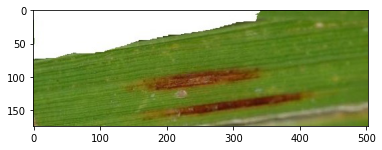

Predicted Disease is Leaf smut


In [270]:
import matplotlib.pyplot as plt
imagetest=skimage.io.imread('/content/drive/MyDrive/kaggle/rice/ricedisease/Leaf smut/DSC_0511.jpg')
grey_images=rgb2grey(imagetest)
flattenimg=[]
img_resized = resize(grey_images,(224,224), anti_aliasing=True, mode='reflect')
flattenimg.append(img_resized.flatten())
%matplotlib inline
plt.imshow(imagetest)
plt.show()
k = target_names
p = clf.predict(flattenimg)

s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted Disease is", k[a])

In [252]:
img_resized.shape

(224, 224, 3)